In [6]:
import os
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from skimage import io, exposure

dataset_dir= zipfile.ZipFile('/content/drive/MyDrive/dataaa.zip', 'r') 
dataset_dir.extractall('/tmp') 
dataset_dir.close()

dataset_dir = "/tmp"
categories = ["keratosis", "eczema", "psoriasis", "rosacea"]
img_size = 224
num_classes = len(categories)
data = []

for category in categories:
    folder_path = os.path.join(dataset_dir, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = io.imread(img_path)
        image = exposure.adjust_gamma(image, gamma=0.5, gain=1)
        image = exposure.rescale_intensity(image, out_range=(0, 255))
        image = load_img(img_path, target_size=(img_size, img_size, 3))
        image = np.array(image)
        image = image.astype('float32') / 255.0
        data.append([image, category])


In [7]:
np.random.shuffle(data)

In [9]:
X = []
y = []
for image, category in data:
    X.append(image)
    y.append(category)

le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    np.array(X_train), y_train, batch_size=32, shuffle=True)

test_generator = test_datagen.flow(
    np.array(X_test), y_test, batch_size=32, shuffle=True)


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(train_generator, epochs=10,
                    validation_data=test_generator)

Epoch 1/10
140/140 [==============================] - 649s 5s/step - loss: 1.3618 - accuracy: 0.3105 - val_loss: 1.3541 - val_accuracy: 0.3113
Epoch 2/10
140/140 [==============================] - 650s 5s/step - loss: 1.3595 - accuracy: 0.3029 - val_loss: 1.3565 - val_accuracy: 0.3113
Epoch 3/10
140/140 [==============================] - 623s 4s/step - loss: 1.3571 - accuracy: 0.3043 - val_loss: 1.3480 - val_accuracy: 0.3113
Epoch 4/10
140/140 [==============================] - 618s 4s/step - loss: 1.3572 - accuracy: 0.3130 - val_loss: 1.3502 - val_accuracy: 0.3113
Epoch 5/10
140/140 [==============================] - 606s 4s/step - loss: 1.3548 - accuracy: 0.3094 - val_loss: 1.3491 - val_accuracy: 0.3113
Epoch 6/10
140/140 [==============================] - 615s 4s/step - loss: 1.3558 - accuracy: 0.3094 - val_loss: 1.3477 - val_accuracy: 0.3229
Epoch 7/10
140/140 [==============================] - 608s 4s/step - loss: 1.3553 - accuracy: 0.3074 - val_loss: 1.3490 - val_accuracy: 0.3113

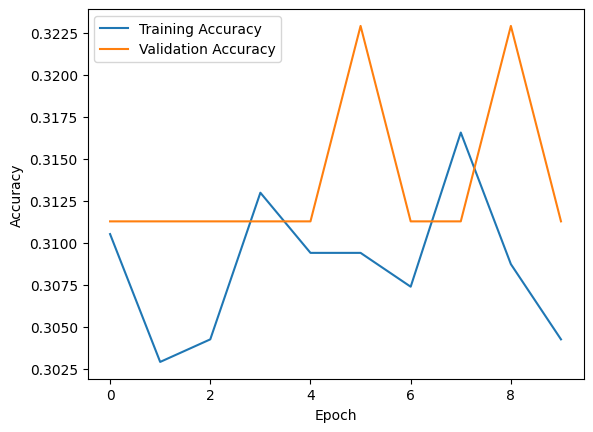

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
loss, accuracy = model.evaluate(test_generator)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


35/35 [==============================] - 38s 1s/step - loss: 1.3469 - accuracy: 0.3113
Test loss: 1.346932291984558
Test accuracy: 0.3112701177597046
